In [64]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt



In [65]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

In [66]:
# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)


In [73]:
import tensorflow as tf

# 입력 레이어
inputs = tf.keras.Input(shape=(1000,))

x1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
x2 = tf.keras.layers.Dense(16, activation='relu')(x1)
x3 = tf.keras.layers.Dense(8, activation='relu')(x2)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)          │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,433 (64.19 KB)

 Trainable params: 16,433 (64.19 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# 신경망 모델 구축
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam


input_layer = Input(shape=(1000,))

hidden1 = Dense(16, activation='relu')(input_layer)
hidden2 = Dense(16, activation='relu')(hidden1)
hidden3 = Dense(1, activation='sigmoid')(hidden2)

output_layer = Dense(1)(hidden3)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 3s - 53ms/step - accuracy: 0.6890 - loss: 0.5948 - val_accuracy: 0.8082 - val_loss: 0.4666
Epoch 2/20
49/49 - 0s - 7ms/step - accuracy: 0.8330 - loss: 0.4191 - val_accuracy: 0.8330 - val_loss: 0.4867
Epoch 3/20
49/49 - 0s - 7ms/step - accuracy: 0.8507 - loss: 0.3788 - val_accuracy: 0.8487 - val_loss: 0.4018
Epoch 4/20
49/49 - 0s - 7ms/step - accuracy: 0.8642 - loss: 0.3510 - val_accuracy: 0.8523 - val_loss: 0.3829
Epoch 5/20
49/49 - 0s - 8ms/step - accuracy: 0.8711 - loss: 0.3387 - val_accuracy: 0.8573 - val_loss: 0.4037
Epoch 6/20
49/49 - 0s - 7ms/step - accuracy: 0.8740 - loss: 0.3270 - val_accuracy: 0.8481 - val_loss: 0.3769
Epoch 7/20
49/49 - 0s - 7ms/step - accuracy: 0.8679 - loss: 0.3372 - val_accuracy: 0.8456 - val_loss: 0.3810
Epoch 8/20
49/49 - 0s - 8ms/step - accuracy: 0.8656 - loss: 0.3418 - val_accuracy: 0.8506 - val_loss: 0.3842
Epoch 9/20
49/49 - 0s - 7ms/step - accuracy: 0.8740 - loss: 0.3186 - val_accuracy: 0.8556 - val_loss: 0.3993
Epoch 10/20
49/49 

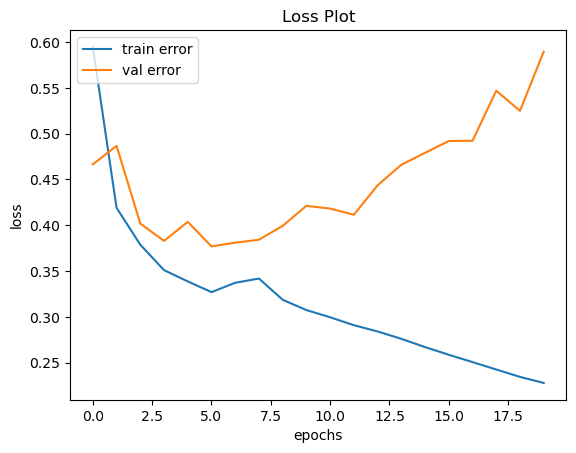

In [68]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()


In [69]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
model.fit(train_data,train_labels, epochs =20,callbacks=[early_stopping])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8927 - loss: 0.2860
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9102 - loss: 0.2451
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9181 - loss: 0.2319
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9269 - loss: 0.2207
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9341 - loss: 0.2060
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9398 - loss: 0.1930
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9476 - loss: 0.1721
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9433 - loss: 0.1799
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.1977
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9530 - loss: 0.1727
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1486
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [70]:
from tensorflow.keras import layers
train_labels= layers.Dropout(0.3)(train_data)

In [72]:
import tensorflow as tf

# 입력 레이어
second_inputs = tf.keras.Input(shape=(1000,))

second_x1 = tf.keras.layers.Dense(16, activation='relu')(second_inputs)
second_x1 = tf.keras.layers.Dropout(0.5)(second_x1)

second_x2 = tf.keras.layers.Dense(16, activation='relu')(second_x1)
second_x2 = tf.keras.layers.Dropout(0.5)(second_x2)

second_x3 = tf.keras.layers.Dense(8, activation='relu')(second_x2)
second_x3 = tf.keras.layers.Dropout(0.5)(second_x3)

second_outputs = tf.keras.layers.Dense(1, activation='sigmoid')(second_x3)

second_model = tf.keras.Model(inputs= second_inputs, outputs= second_outputs)

second_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

second_model.summary()

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,433 (64.19 KB)

 Trainable params: 16,433 (64.19 KB)

 Non-trainable params: 0 (0.00 B)